# Assignment 2

## Q1
$$
\begin{array}{rl}
Z =X / Y \\
\nabla X_{i j}=\frac{\partial l}{\partial X_{i j}} & =\sum_{a b} \frac{\partial l}{\partial Z_{a b}} \frac{\partial Z_{a b}}{\partial X_{i j}} \\
& =\sum_{a b} \nabla Z_{a b} \frac{\partial[X / Y]_{a b}}{\partial X_{i j}} \\
& =\sum_{a b} \nabla Z_{a b} \frac{\partial\left(\frac{X_{a b}}{Y_{a b}}\right)}{\partial X_{i j}} \\
& =\nabla Z_{i j} \frac{\partial\left(\frac{X_{i j}}{Y_{i j}}\right)}{\partial X_{i j}} \\
\nabla X_{i j} & =\nabla Z_{i j} \frac{1}{Y_{i j}} \\
\nabla Y_{i j} & =\nabla Z_{i j}\left(-\frac{X_{i j}}{Y_{i j}^{2}}\right) \\
\nabla X & =\frac{\nabla Z}{Y} \\
\nabla Y & =-\frac{Z \times X}{Y^{\cdot 2}}
\end{array}
$$
where $Y^{\cdot 2}$ is the elementise application of $f(x) = x^2$.

## Q2

$$
\begin{aligned} F: X \rightarrow Y, Y_{i j} &=f\left(X_{i j}\right) \\ \nabla X_{i j}=\frac{\partial l}{\partial X_{i j}} &=\sum_{a b c} \frac{\partial l}{\partial Y_{a b c}} \frac{\partial Y_{a b c}}{\partial X_{i j k}} \\ &=\sum_{a b c} \nabla Y_{a b c} \frac{\partial Y_{a b c}}{\partial X_{i j k}} \\ &=\sum_{a b c} \nabla Y_{a b c} \frac{\partial f\left(X_{a b c}\right)}{\partial X_{i j k}} \\ &=\nabla Y_{i j k} \frac{\partial f\left(X_{i j k}\right)}{\partial X_{i j k}} \\ &=\nabla Y_{i j k} f^{\prime}\left(X_{i j k}\right) \forall f\end{aligned}
$$

The vectoriZed operation then depends on $f$ of course.

## Q3


$$
W \in \mathbb{R}^{f \times m},
X \in \mathbb{R}^{n \times f},
Z \leftarrow X \circ W \in \mathbb{R}^{n \times m}
$$

$$
\begin{aligned} \nabla W_{i j}=\frac{\partial l}{\partial W_{i j}} &=\sum_{n m} \frac{\partial l}{\partial Z_{n m}} \frac{\partial Z_{n m}}{\partial W_{i j}} \\ &=\sum_{n m} \nabla Z_{n m} \frac{\partial Z_{n m}}{\partial W_{i j}} \\ &=\sum_{n m} \nabla Z_{n m} \frac{\partial \Sigma_{f} X_{n f} W_{f m}}{\partial W_{i j}} \\ &=\sum_{n} \nabla Z_{n j} \frac{\partial X_{n i} W_{i j}}{\partial W_{i j}} \\ \nabla W_{i j} &=\sum_{n} \nabla Z_{n j} X_{n i} \\ \nabla W &=X^{\top} \circ \nabla Z \end{aligned}
$$

and 

$$
\begin{aligned} \nabla X_{i j} &=\sum_{n m} \nabla Z_{n m} \frac{\partial Z_{n m}}{\partial X_{i j}} \\ &=\sum_{n m} \nabla Z_{n m} \frac{\partial \sum_{f} X_{n f} W_{f m}}{\partial X_{i j}} \\ &=\sum_{m} \nabla Z_{i m} \frac{\partial X_{i j} W_{j m}}{\partial X_{i j}} \\ \nabla X_{i j} &=\sum_{m} \nabla Z_{i m} W_{j m} \\ \nabla X &= \nabla Z \cdot W^{\top} \end{aligned}
$$



## Q4
$$
f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n \times m}
$$


$$
f(X)=\underset{(n \times 1)}{X}  \underset{(1 \times 16)}{\mathbb{1}^{\top}} \to Z \in \mathbb{R}^{n \times 16}
$$

$$
\begin{aligned} \nabla X_{i} &=\sum_{a b} \frac{\partial l}{\partial Z_{a b}} \frac{\partial Z_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial Z_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial\left[X \mathbb{1}^{\top} \right]_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial X_{a} \cdot \mathbb{1}^{\top}_{b}}{\partial X_{i}} \\ &=\sum_{b} \nabla Z_{i b} \frac{\partial X_{i} \mathbb{1}^{\top}_{b}}{\partial X_{i}} \\ \nabla X_{i} &=\sum_{b} \nabla Z_{i b} \quad \mathbb{1}^{\top}_{b} \\ \nabla X &=  \nabla Z \mathbb{1} \end{aligned}
$$

## Q5

In [2]:
import vugrad as vg
import numpy as np

In [5]:
a = vg.TensorNode(np.random.randn(2, 2))
b = vg.TensorNode(np.random.randn(2, 2))
c = a + b

### 5.1
c.value is the value of the actual array that results from the operation. In this case elementwise addition of a and b.
### 5.2
c.source refers to the origin of the creation of c. A source should contain both the input objects as well as the operation, i.e. add(a, b)
### 5.3
c.source.inputs[0] must be a.

In [17]:
c.source.inputs[0] is a

True

### 5.4
At this point c.grad should contain simply a placeholder for the gradient, possibly NaNs or Zeros.

## Q6

### 6.1
Theres the Op class which defines the operation under the hood. We dont need to explictily instantiate it, but we refer to it when we create OpNodes.

### 6.2
In vugrad the <+> operator has been overloaded to do tensor (elementwise) addition of objects instead of scalar addition as it would be the standard in python. In line 104 (core.py) onwards we can see how different builtin operations have been overloaded. In line 317, an add class is additionally defined (inherits from Op of course).

### 6.3
The actual output is computed when we are upstreaming the computation graph. The do_forward method of the Op class is called when the forward pass is performed on the entire computation graph. Code can be found in 217:249.

## Q7


The backward function is called on the TensorNode as soon as we collect gradients when calling loss.backward(), triggering the cascade of backward()-calls on its parents and so forth. <--Line 97-->


### Q8



a. NORMALIZE

Let

$$
X \in \mathbb{R}^{m \times n} \\
Z = \frac{X}{X  \mathbb{1}}
$$

Then

$$
\begin{aligned}
X_{i j}^{\nabla} &=\sum_{a b} \frac{\partial l}{\partial Z_{a b}} \cdot \frac{\partial Z_{a b}}{\partial X_{i j}}=\sum_{a b} Z_{a b}^{\nabla} \frac{\partial \frac{X_{a b}}{\sum_{c} X_{a c}}}{\partial X_{i j}}=\sum_{b} Z_{i b} \cdot \frac{\partial \frac{X_{i b}}{\sum_{c} X_{i c}}}{\partial X_{i j}}=\\
&=\sum_{b} Z_{i b}\left(\frac{X_{i b}^{\prime}}{\sum_{c} X_{i c}}-\frac{X_{i b}}{\left(\sum_{c} X_{i c}\right)^{2}}\right)=\sum_{b} Z_{i b}^{\nabla} \frac{X_{i b}^{\prime}}{\sum_{c} X_{i c}}-\sum_{b} Z_{i b}^{\nabla} \cdot \frac{X_{i b}}{\left(\sum_{c} X_{i c}\right)^{2}} \\
&=\frac{Z_{i j}^{\nabla}}{\sum_{c} X_{i c}}-\sum_{b} Z_{i b}^{\nabla} \cdot \frac{X_{i b}}{\left(\sum_{c} X_{i c}\right)^{2}} \\
X^{\nabla} &=\frac{Z^{\nabla}}{X \cdot \mathbb{1}}-\left(\frac{Z^{\nabla} \odot X}{(X \cdot \mathbb{1})^{\circ 2}}\right) \cdot \mathbb{1}
\end{aligned}
$$

b. EXPAND-SINGLTON 


input 

$$
X \in \mathbb{R}^{a \times b \times ...  \times 1  \times ... }
$$

number of repeats expansions in the singleton : $K$.

$$
f: \mathbb{R}^{n \times 1} \rightarrow \mathbb{R}^{n \times K}
$$

$$
f(X)=\underset{(n \times 1)}{X}  \underset{(1 \times K)}{\mathbb{1}^{\top}} \to Z \in \mathbb{R}^{n \times K}
$$

$$
\begin{aligned} \nabla X_{i} &=\sum_{a b} \frac{\partial l}{\partial Z_{a b}} \frac{\partial Z_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial Z_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial\left[X \mathbb{1}^{\top} \right]_{a b}}{\partial X_{i}} \\ &=\sum_{a b} \nabla Z_{a b} \frac{\partial X_{a} \cdot \mathbb{1}^{\top}_{b}}{\partial X_{i}} \\ &=\sum_{b} \nabla Z_{i b} \frac{\partial X_{i} \mathbb{1}^{\top}_{b}}{\partial X_{i}} \\ \nabla X_{i} &=\sum_{b} \nabla Z_{i b} \quad \mathbb{1}^{\top}_{b} \\ \nabla X &=  \nabla Z \mathbb{1} \end{aligned}
$$


c. EXPAND-SCALAR : a special case of expand, where a single scalar is being expanded to any shape. Its not implemented in vugrad 

$$
\begin{array}{c}
s \gets \left(a, b, c_, \ldots \right) \\
f(x, s)=Z \in \mathbb{R}^{s}, Z_{a b c ...}=x \ \forall \ a b c ... \ \in s \\
\nabla x=\sum_{a b} \nabla Z_{a b} \frac{\partial Z_{a b}}{\partial x} \\
\nabla x=\sum_{a b} \nabla Z_{a b} \frac{\partial x}{\partial x} \\
\nabla x=\sum_{a b} \nabla Z_{a b} \\
\nabla x=\mathbb{1}^{\top} \nabla Z_{a b} \mathbb{1}
\end{array}
$$

## Q9


```Python
# The operation
class relu(Op):
    @staticmethod
    def forward(context, input):
        relu_x = np.fmax(input, np.Zeros(input.shape))
        context['relu_x'] = relu_x 
        return relu_x

    @staticmethod
    def backward(context, goutput):
        relu_x = context['relu_x']
        return goutput * np.where(relu_x > 0, 1, 0)
# The wrapper
def relu_(x):
    return relu.do_forward(x)




Using a learning rate of `10e-6` both the sigmoid and the relu achieve a validation accuracy of 93-96 % **after a single epoch**. To be exact:

93.32 (+- 1.98)
96.01 (+- 1.42)

again, after a single epoch ( runs : n=10 )

When I continue training (5 epochs) , I observe an increase up to about 98% accuracy for the relu and 96% for the sigmoid. To summariZe, the relu is always 2-3% better in terms of validation accuracy gain per epoch. However I didnt notice any training speedup, which I expected.

## Q10

Since the model is already very good yielding a validation accuracy of 98% after just a couple of epochs, there is not so much I can experiment with to make it better. However what I can do is I can try to decrease the number of parameters of the model in a way that doesnt hurt the performance and without using a CNN. Right now the model has 2.493.130 parameters. By going adding more layers and using skip connections I can downsiZe the model significantly. With

```python
            self.layer1 = vg.Linear(input_size, hidden_size)
            self.layer2 = vg.Linear(hidden_size, hidden_size)            
            self.layer3 = vg.Linear(hidden_size, hidden_size)
            self.layer4 = vg.Linear(hidden_size, hidden_size)
            self.layer5 = vg.Linear(hidden_size, hidden_size)
            
  ```
and doing the forward like this :
  
```python
            
            
            Z1 = self.layer1(input)
            A1 = vg.relu_(Z1)     
            
            Z2 = self.layer2(A1)
            A2 = vg.relu_(Z2 + A1)
            
            Z3 = self.layer3(A2)
            A3 = vg.relu_(Z3 + A2)
            
            Z4 = self.layer4(A3)
            A4 = vg.relu_(Z4 + A3)  

            Z5 = self.layer5(A4)
            A5 = output = vg.logsoftmax(Z5)
```
            
I am having a total of 4 weight sets and a total of 49.450 parameters, compared to the default model with 2.493.130 parameters my model is about 50 times smaller and trains at least 5 times faster.

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mynet = pd.read_csv("result.csv",
                    index_col=0)[["loss","accuracy", "epoch"]]
default = pd.read_csv("result0.csv",
                      index_col=0)[["loss","accuracy", "epoch"]]

mynet["model"] = "tiny"
default["model"] = "default"
df = mynet.append(default).reset_index(drop=True)

<AxesSubplot:xlabel='epoch', ylabel='accuracy'>

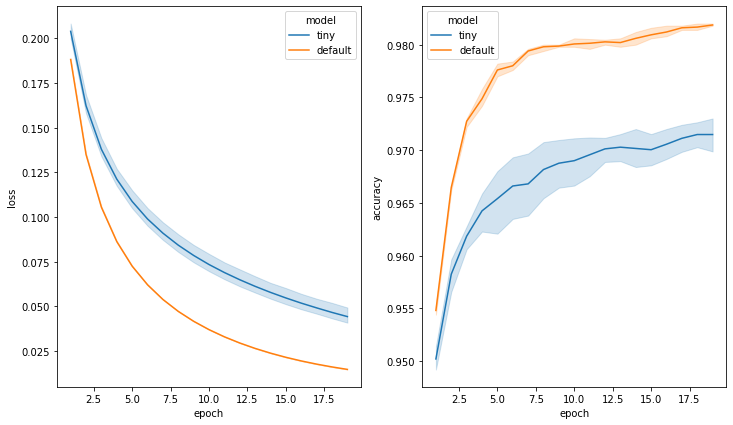

In [129]:
fig, axes = plt.subplots(1,2,sharey=False, figsiZe=(12,7))
sns.lineplot(data=df[df.epoch >= 1], x="epoch", y="loss", hue="model",ax=axes[0])
sns.lineplot(data=df[df.epoch >= 1], x="epoch", y="accuracy", hue="model",ax=axes[1])


We can see that my tiny model is a little bit worse (~ -1%) accuracy (10 runs with 20 epochs each) , but it has 50x less parameters and trains much faster. Note that epoch 1 was omitted from the chart.

## Q11



I changed the default hyperparameter configuration by looking at different values of the learning rate and batch size and epochs. The results are not particularly interesting, as we see the expected behaviour. row0 represents the default config (= Nothing changed, just using Adam instead of SGDM)

In [209]:
lr_results

,Test Accuracy,lr
0,62.13,0.00100
1,63.61,0.00010
2,64.72,0.00001


In [207]:
batch_results

,Test Accuracy,batch_size
0,62.13,4
1,61.41,8
2,58.42,16


In [219]:
epoch_results

,Test Accuracy,n_epochs
0,58.51,4
1,62.13,8
2,65.02,16


Compared to the default hyperparams, increasing the number of epochs as well as using a smaller learning rate might be a good idea.

## Q12




The network is already quite efficient in terms of size due to the use of the specialized convolutional layers. I added some standard tricks to the architecture : dropout in the FC layers, and Batchnorm across the whole model.

```python

class myNet(nn.Module):
    def __init__(self):
        super().__init__()        
        self.layers = nn.Sequential(
            nn.BatchNorm2d(3),
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.BatchNorm1d(120),
            nn.Dropout(0.5),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.BatchNorm1d(84),
            nn.Linear(84, 10))
            
    def forward(self, x):
        return self.layers(x)
```

<AxesSubplot:>

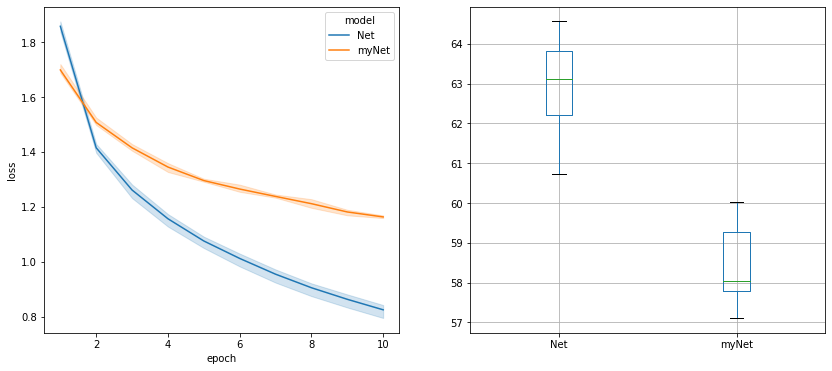

In [ ]:
df = df1.append(df2).reset_index(drop=True)
import matplotlib.pyplot as plt, seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.lineplot(data=df, x="epoch", y="loss", hue="model",ax=axes[0])
accuracy_results.boxplot(ax=axes[1])

For a total of 5 runs with 10 epochs each, above we see the learning curve as well as the test acc distributions. My model is significantly worse than the default model, although it uses batchnorm and dropout. I guess dropout of 0.5 is just making the model underfit. 0.1 or simply doubling the epochs might give a different view.